In [340]:
from geopy.geocoders import Nominatim
import numpy as np
import rasterio
from PIL import Image
import matplotlib.pyplot as plt

In [341]:
#function to fetch lat and long given city name
def get_location(city):
    arr = {}
    geolocator = Nominatim(user_agent="megh_varta")
    location = geolocator.geocode(city)
    arr['city'], arr['lat'], arr['lon'] = location.raw['display_name'], np.float(location.raw['lat']), np.float(location.raw['lon'])
    return arr

#convert longitude and latitude to corresponding pixels
def cords_to_pixel(lon, lat):
    xs = (1074.0/36) * (lon-62.8)
    ys = 984-((984.0/33) * (lat-4.5))
    return (xs, ys)

# def cords_to_pixel(lon, lat):
#     xs, ys= rasterio.transform.rowcol(src.transform,  location['lon'],location['lat'],)
#     return ( ys,xs)

In [370]:
geolocator = Nominatim(user_agent="megh_varta")
location = geolocator.geocode("Nagpur")
print(location.address)

Mumbai, Santa Cruz – Chembur Link Road, Hallow Pul, L Ward, Zone 5, Mumbai, Mumbai Suburban, Maharashtra, 400070, India


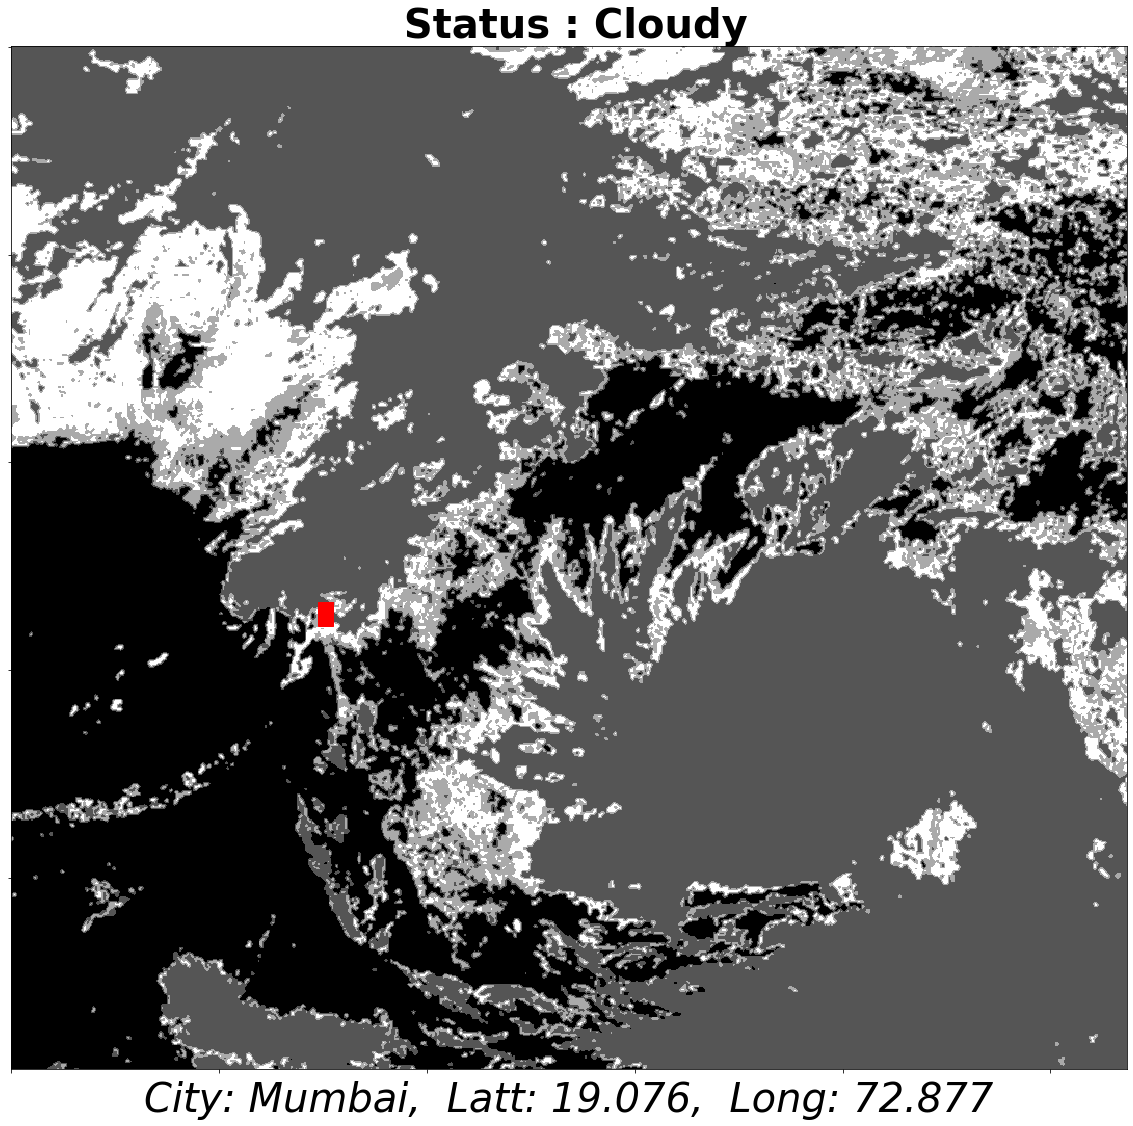

In [380]:
img = Image.open("CMK_Cropped_16.tif")
ar = np.array(img)

#img2 = Image.open("India_transparent.png")
#ar1 = np.array(img2)

#city -> location
city_name="Mumbai"
location = get_location(city_name)

#lon, lat -> pixels
pixel_cord = cords_to_pixel(location['lon'], location['lat'])
mask = ar[int(pixel_cord[0]), int(pixel_cord[1])]

mask_str = ""

if mask == 0:
    mask_str = "Clear"
else:
    mask_str = "Cloudy"

#display

fig2 = plt.figure(figsize = (20,20))
ax3 = fig2.add_subplot(111)
x_label = "City: "+ location['city'].split(",")[0] + ",  Latt: " +str(round(location['lat'],3)) + ",  Long: " + str(round(location['lon'],3))
ax3.set_xlabel(x_label, fontsize=40, style="italic")

# Turn off tick labels
ax3.set_yticklabels([])
ax3.set_xticklabels([])

ax3.imshow(ar, cmap='gray')
ax3.annotate(' ', xy=pixel_cord, xycoords='data',
             backgroundcolor='red',fontsize=13)
ax3.set_title(" Status : " + mask_str,fontsize=40, fontweight="bold")
#plt.savefig("cords.jpg")
plt.show()